In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
dt=pd.read_csv("company_data.csv")
dt.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA

In [3]:
dt.shape

(400, 11)

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
dt.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
dt.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
dt.sample(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
342,7.81,137,102,13,422,118,Medium,71,10,No,Yes
108,3.47,107,79,2,488,103,Bad,65,16,Yes,No
132,9.54,125,87,9,232,136,Good,72,10,Yes,Yes
97,7.45,161,82,5,287,129,Bad,33,16,Yes,Yes
299,9.40,135,40,17,497,96,Medium,54,17,No,Yes
11,11.96,117,94,4,503,94,Good,50,13,Yes,Yes
332,5.74,106,33,20,354,104,Medium,61,12,Yes,Yes
311,6.15,146,68,12,328,132,Bad,51,14,Yes,Yes
243,7.82,124,25,13,87,110,Medium,57,10,Yes,Yes
307,5.90,138,92,0,13,120,Bad,61,12,Yes,No


# PAIR PLOT

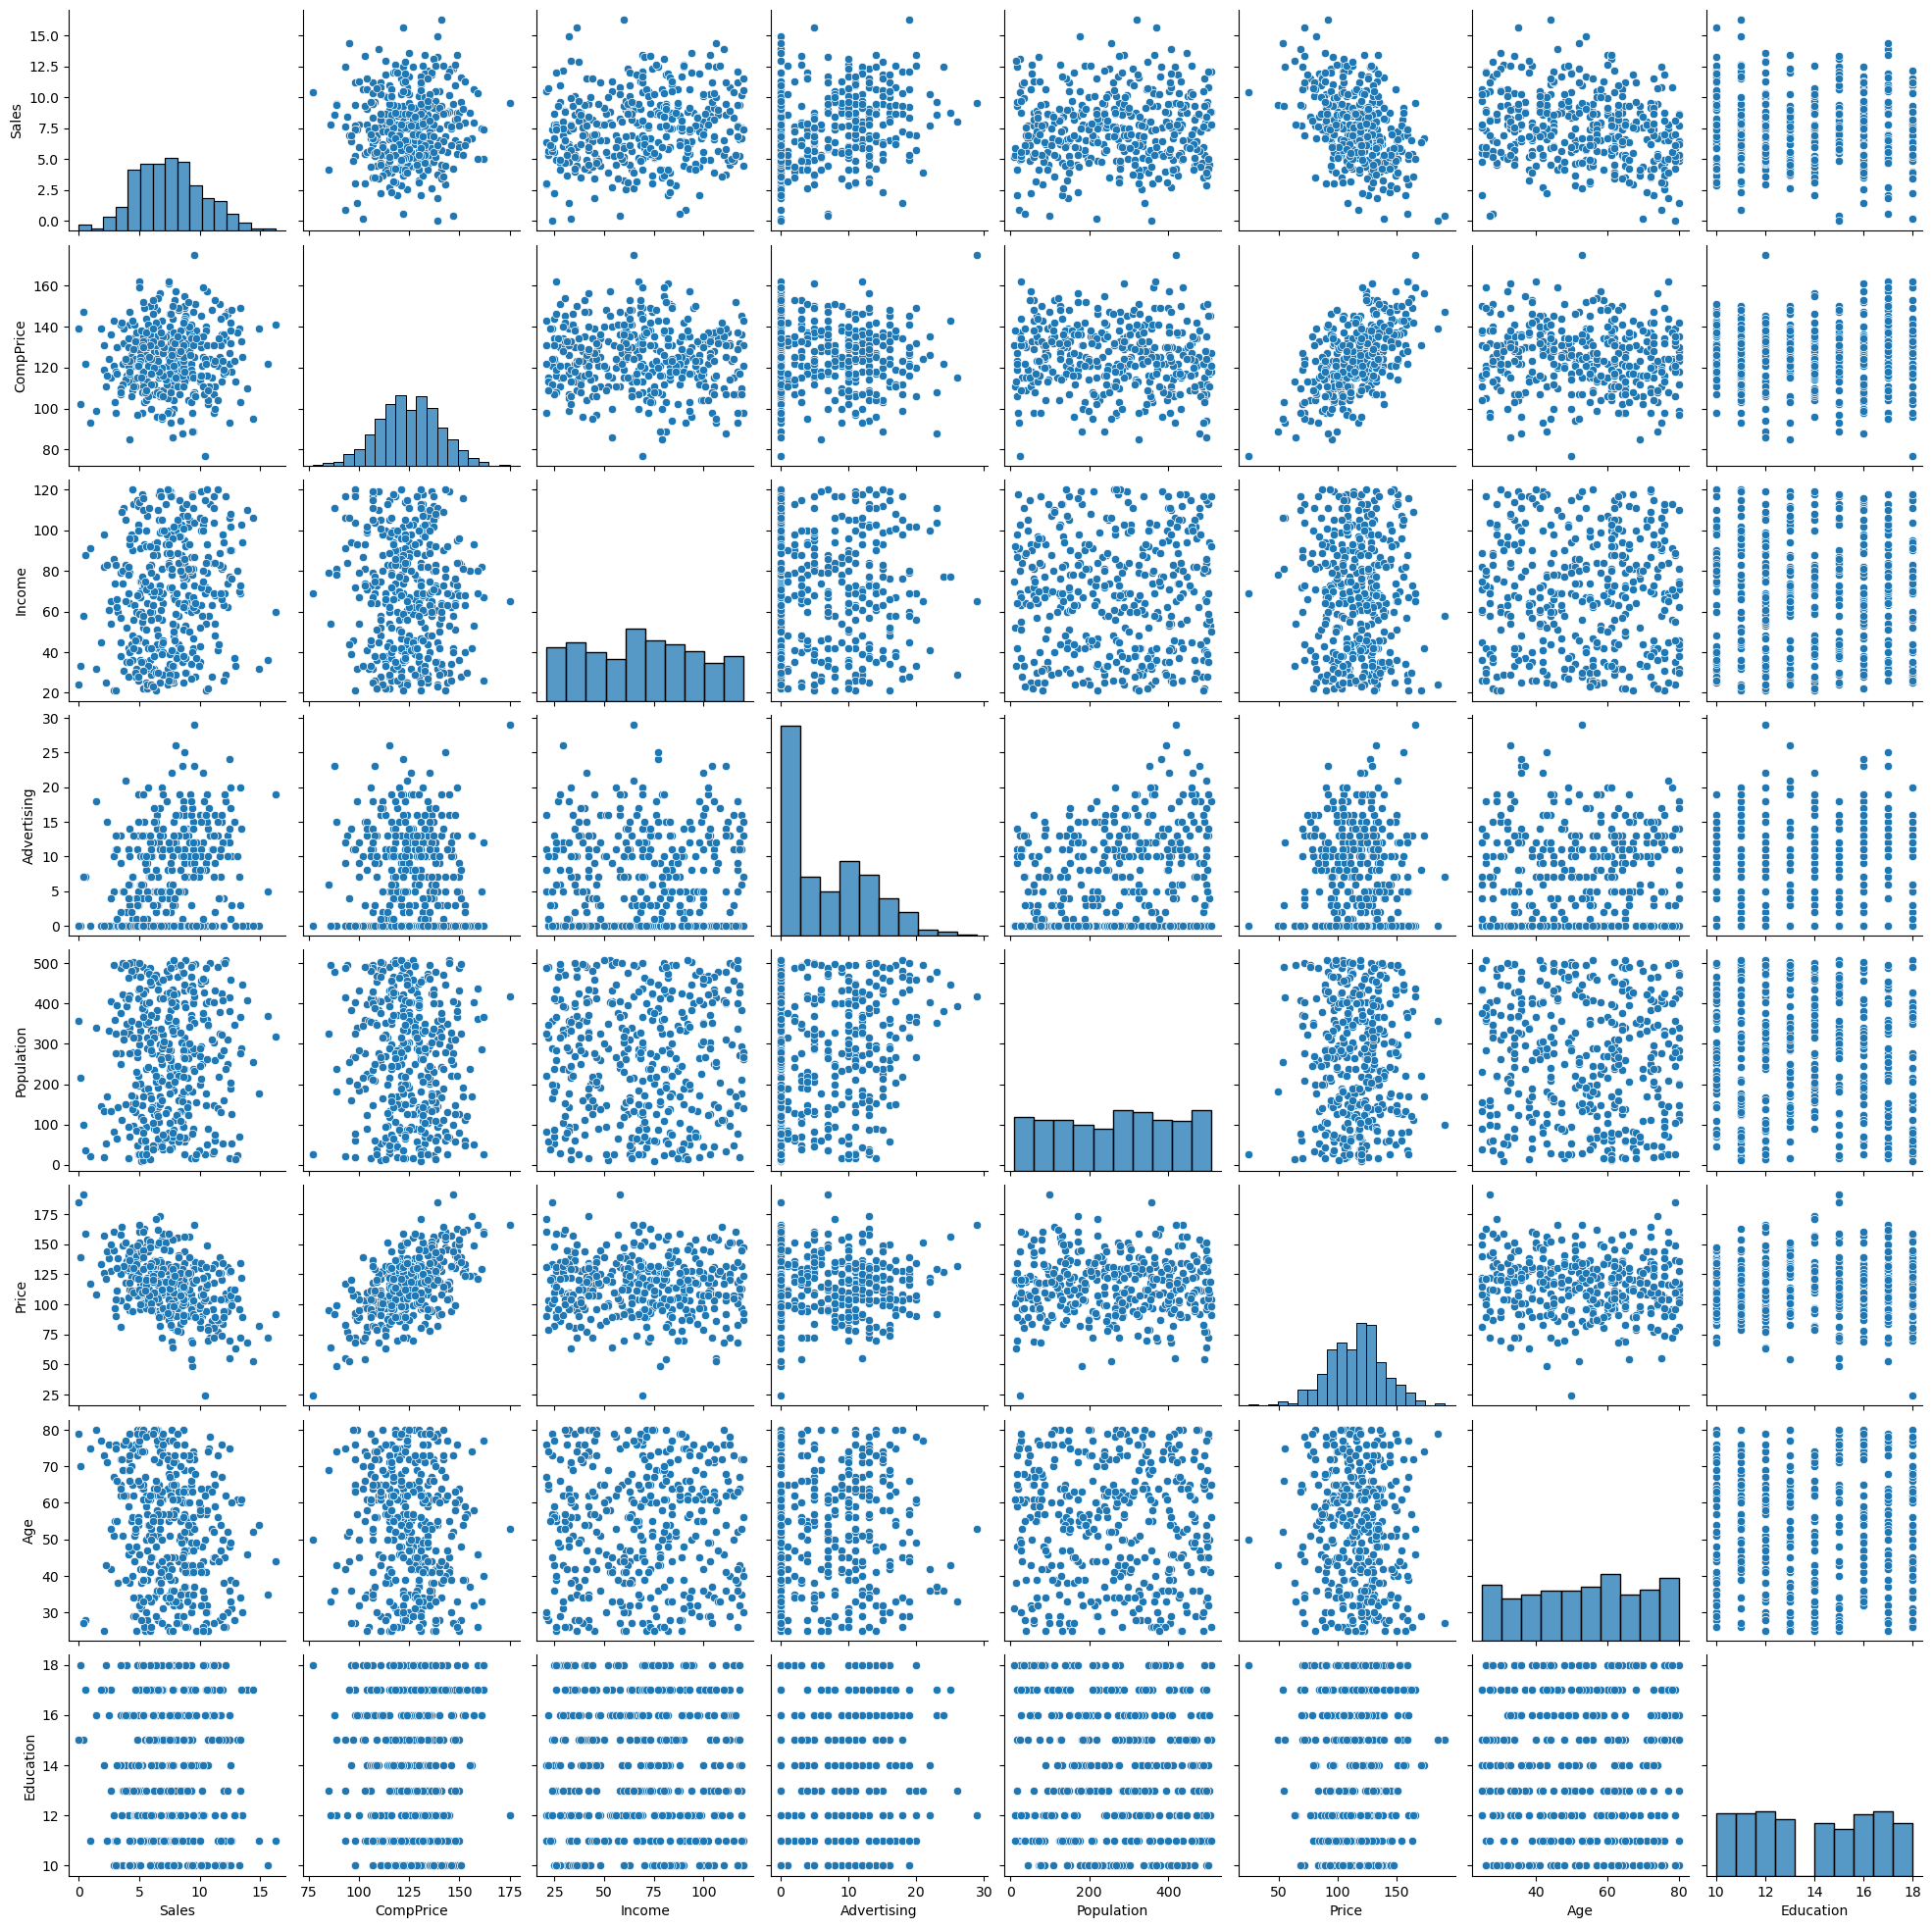

In [8]:
sns.pairplot(dt)

# DATA PREPROCESSING

# coverting Sales variables into categorical as Low , High ,Medium

In [9]:
dt['Sales']=pd.cut(x=dt['Sales'],bins=[0,6,12,17],labels=['Low','Medium','High'])

In [10]:
dt['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [11]:
dt.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Medium,111,48,16,260,83,Good,65,10,Yes,Yes
2,Medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
5,Medium,124,113,13,501,72,Bad,78,16,No,Yes
6,Medium,115,105,0,45,108,Medium,71,15,Yes,No
7,Medium,136,81,15,425,120,Good,67,10,Yes,Yes
8,Medium,132,110,0,108,124,Medium,76,10,No,No
9,Low,132,113,0,131,124,Medium,76,17,No,Yes


In [12]:
dt['Sales'].value_counts()

Medium    243
Low       129
High       27
Name: Sales, dtype: int64

# Other attributes converting into categories

In [13]:
dt['CompPrice']=pd.cut(x=dt['CompPrice'],bins=[77,100,133,176],labels=['Low','Medium','High'],right=False)
dt['Income']=pd.cut(x=dt['Income'],bins=[21,46,71,121],labels=['Low','Medium','High'], right=False)
dt['Advertising']=pd.cut(x=dt['Advertising'],bins=[0,10,20,30], labels=['Low','Medium','High'],right=False)
dt['Population']=pd.cut(x=dt['Population'],bins=[10,170,340,510], labels=['Low','Medium','High'],right=False)
dt['Price']=pd.cut(x=dt['Price'],bins=[24,80,136,192],labels=['Low','Medium','High'],right=False)
dt['Age']=pd.cut(x=dt['Age'],bins=[25,45,60,81],labels=['Low','Medium','High'],right=False)
dt['Education']=pd.cut(x=dt['Education'],bins=[10,12.5,15,19],labels=['Low','Medium','High'],right=False)

In [14]:
dt.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,High,High,High,Medium,Medium,Medium,Good,Low,Medium,Yes,Yes
396,Medium,High,Low,Low,Low,Medium,Medium,Medium,Low,No,Yes
397,Medium,High,Low,Medium,High,High,Medium,Low,High,Yes,Yes
398,Low,Medium,High,Low,Medium,Medium,Bad,Medium,Low,Yes,Yes
399,Medium,High,Low,Low,Low,Medium,Good,Medium,High,Yes,Yes


# Encoding the categorical data

In [15]:
le = preprocessing.LabelEncoder()

In [16]:
dt['Sales']=le.fit_transform(dt['Sales'])
dt['CompPrice']=le.fit_transform(dt['CompPrice'])
dt['Income']=le.fit_transform(dt['Income'])
dt['Advertising']=le.fit_transform(dt['Advertising'])
dt['Population']=le.fit_transform(dt['Population'])
dt['Price']=le.fit_transform(dt['Price'])
dt['ShelveLoc']=le.fit_transform(dt['ShelveLoc'])
dt['Age']=le.fit_transform(dt['Age'])
dt['Education']=le.fit_transform(dt['Education'])
dt['Urban']=le.fit_transform(dt['Urban'])
dt['US']=le.fit_transform(dt['US'])


In [17]:
dt

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,2,1,0,1,1,1
2,2,2,1,2,2,2,2,2,1,1,1
3,2,2,0,1,0,2,2,2,2,1,1
4,1,0,2,1,0,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,2,2,2,1,1,2,1,1
396,2,0,1,1,1,2,2,2,1,0,1
397,2,0,1,2,0,0,2,1,0,1,1
398,1,2,0,1,2,2,0,2,1,1,1


In [18]:
dt.dtypes

Sales          int32
CompPrice      int32
Income         int32
Advertising    int32
Population     int32
Price          int32
ShelveLoc      int32
Age            int32
Education      int32
Urban          int32
US             int32
dtype: object

# Model Building

In [19]:
x=dt.drop('Sales',axis=1)
y=dt['Sales']

In [20]:
x.sample(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
174,0,1,1,0,0,2,0,0,0,0
305,2,1,0,0,2,2,1,2,1,1


In [21]:
y.head()

0    2
1    2
2    2
3    2
4    1
Name: Sales, dtype: int32


# Split data into train and test data

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.44,random_state=10)

In [23]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
302,2,0,2,0,2,0,0,2,1,1
184,2,1,1,1,2,2,0,1,0,1
251,0,0,1,2,2,0,0,2,1,1
189,2,0,2,0,2,2,1,0,0,1
132,2,0,1,2,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
369,0,0,0,0,2,2,1,2,1,1
320,0,2,2,2,0,2,1,0,1,1
15,0,0,1,0,0,2,0,0,0,0
125,1,0,1,2,1,2,1,0,0,0


In [24]:
y_train

302    1
184    2
251    1
189    0
132    2
      ..
369    2
320    1
15     2
125    2
265    1
Name: Sales, Length: 224, dtype: int32

In [25]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
332,2,1,0,0,2,2,0,1,1,1
111,2,0,2,2,0,2,1,2,1,1
352,0,0,2,2,2,1,0,0,1,1
205,2,1,1,2,2,2,1,1,1,0
56,0,0,1,1,2,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...
288,2,1,1,1,2,2,0,0,0,0
387,0,0,2,2,2,2,0,2,0,1
266,2,0,2,0,2,1,0,0,0,1
148,2,0,1,0,2,2,0,2,0,1


In [26]:
y_test

332    1
111    2
352    0
205    1
56     2
      ..
288    2
387    2
266    2
148    2
38     2
Name: Sales, Length: 176, dtype: int32

# Building a model using C5.0 (ENTROPY) Algorithm

In [27]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

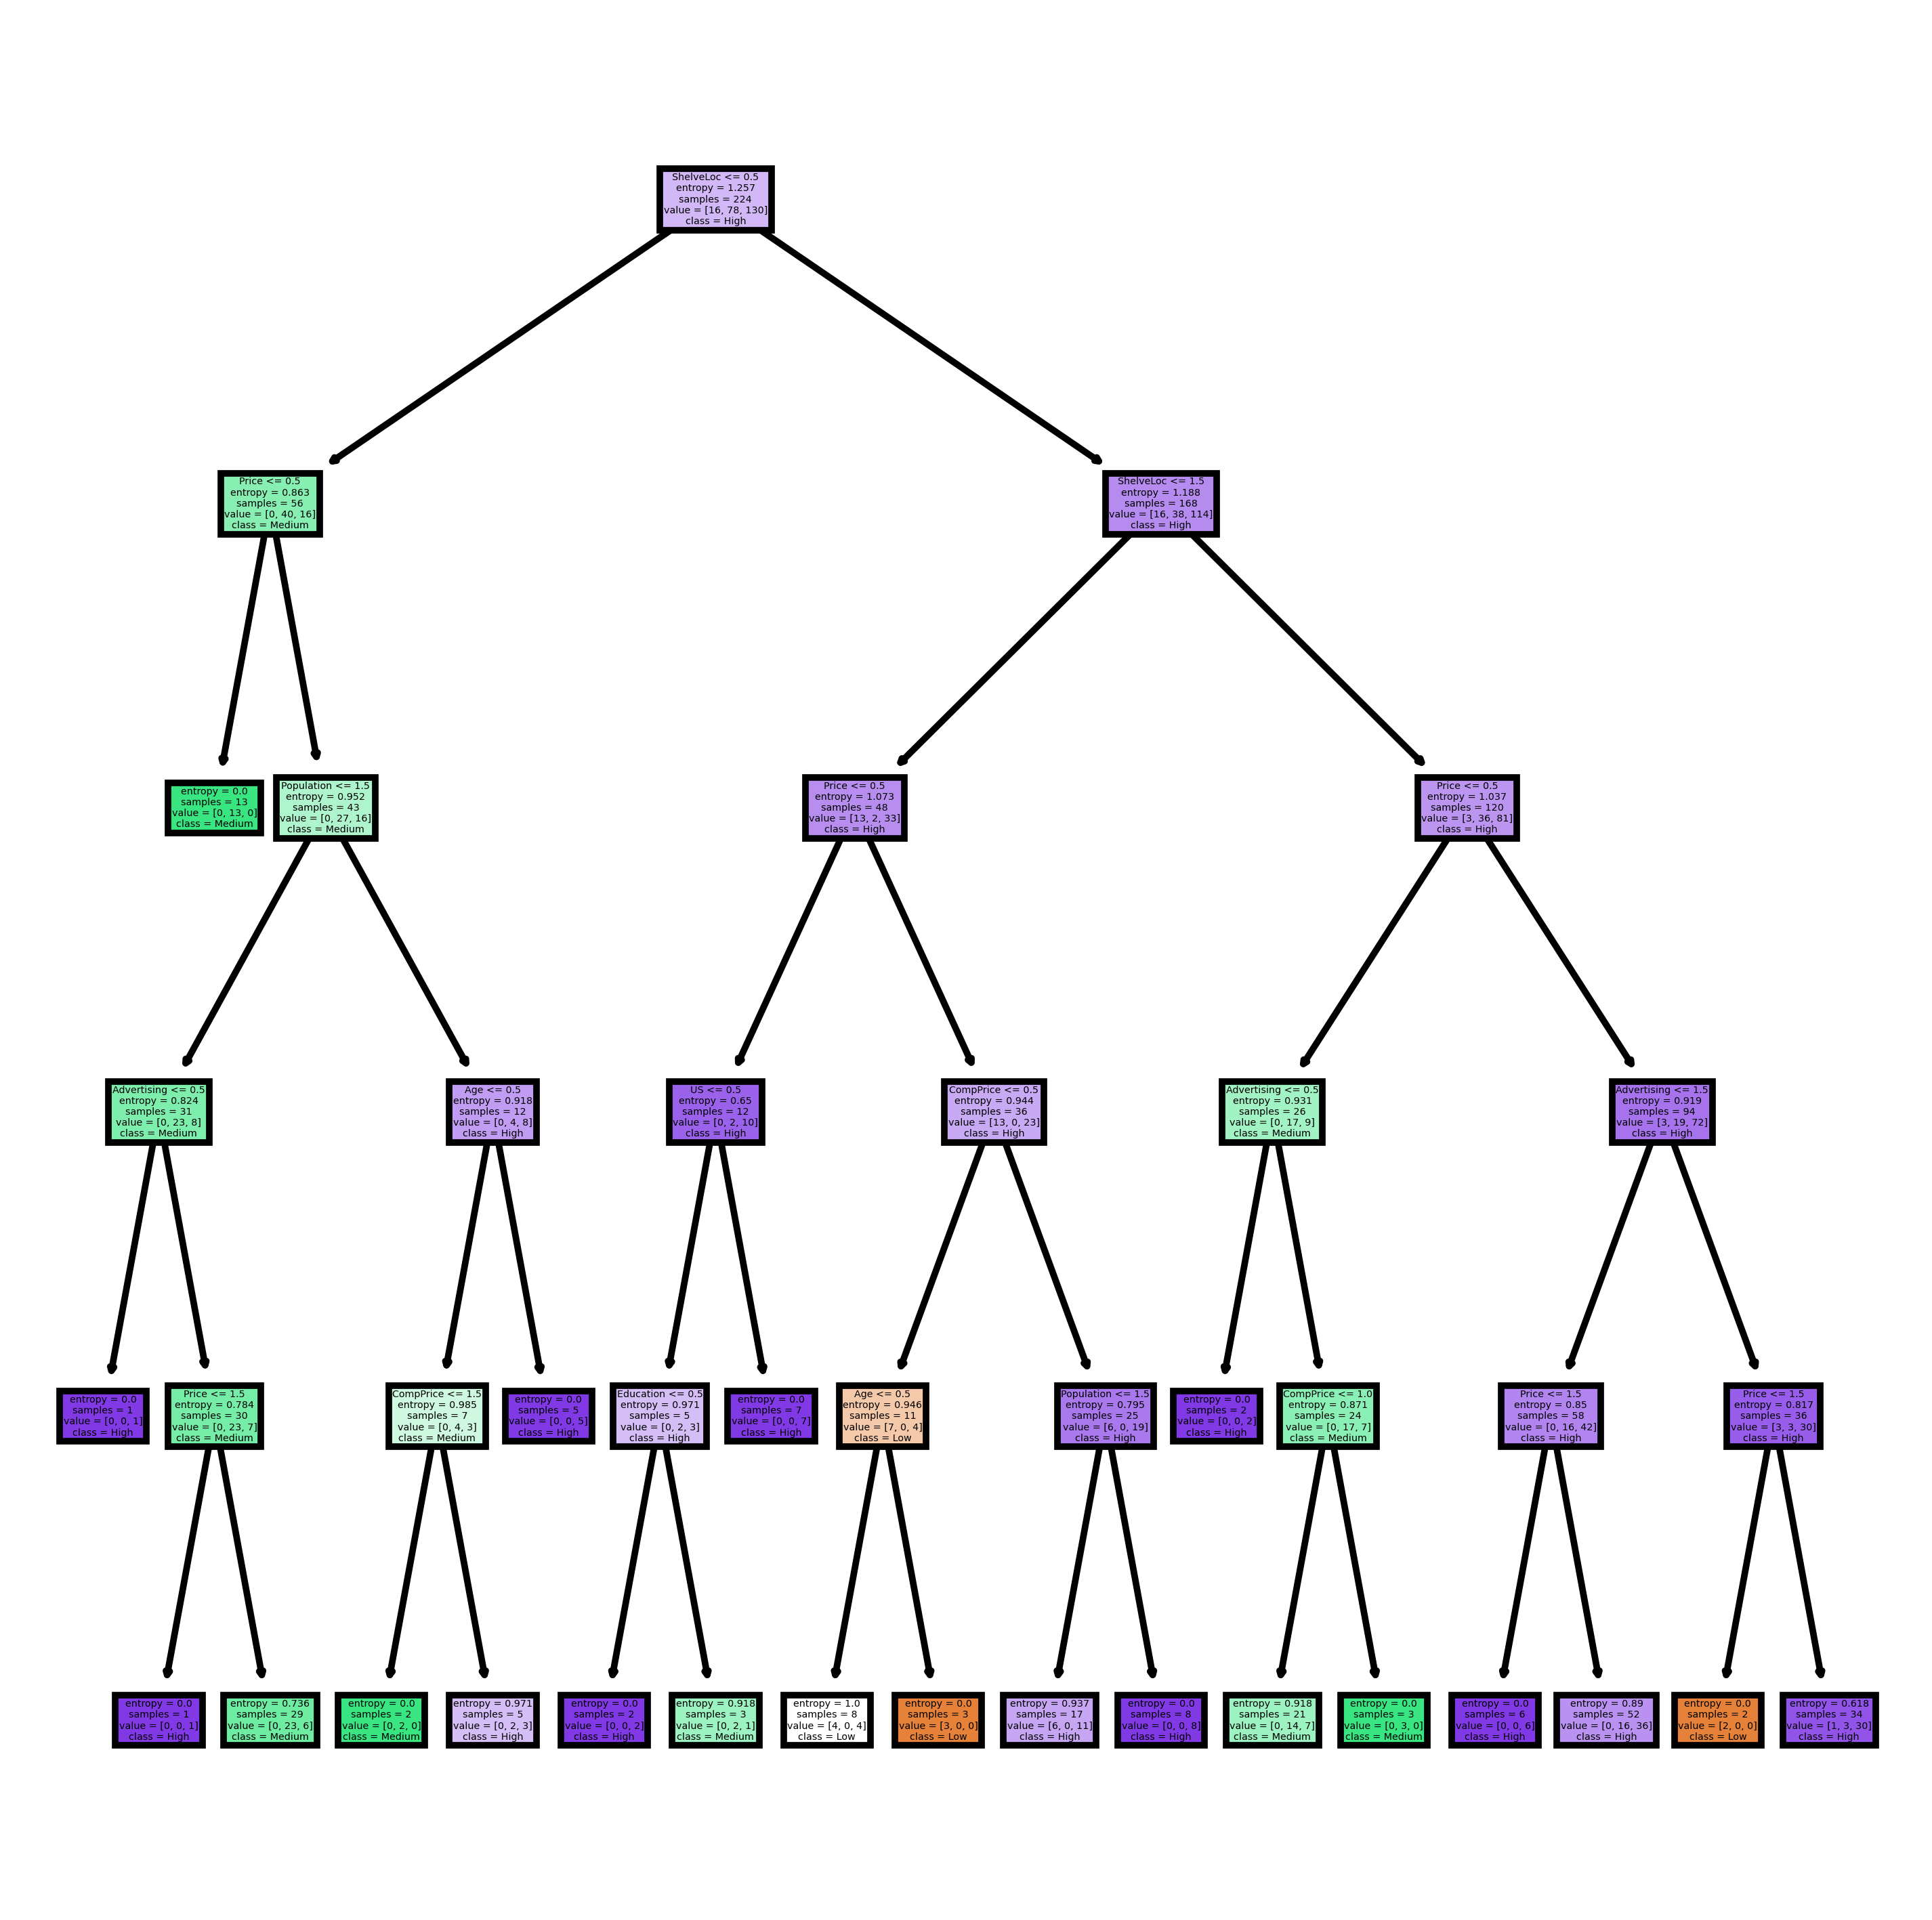

In [28]:
feature=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cs=['Low','Medium','High']
fig, axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=700)
tree.plot_tree(model1,feature_names=feature,class_names=cs,filled=True);
plt.show()

In [29]:
pred=model1.predict(x_test)

In [30]:
pred

array([2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0,
       0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 1, 1, 2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1,
       2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
pd.crosstab(y_test,pred)

col_0,0,1,2
Sales,,,
0,4,0,7
1,0,21,30
2,7,16,90
3,0,1,0


In [32]:
model1.score(x_test,y_test)

0.6534090909090909

In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.36      0.36      0.36        11
           1       0.55      0.41      0.47        51
           2       0.71      0.80      0.75       113
           3       0.00      0.00      0.00         1

    accuracy                           0.65       176
   macro avg       0.41      0.39      0.40       176
weighted avg       0.64      0.65      0.64       176



# Build a model using CART (GINI) Algorithm

In [34]:
model2=DecisionTreeClassifier(criterion='gini',max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

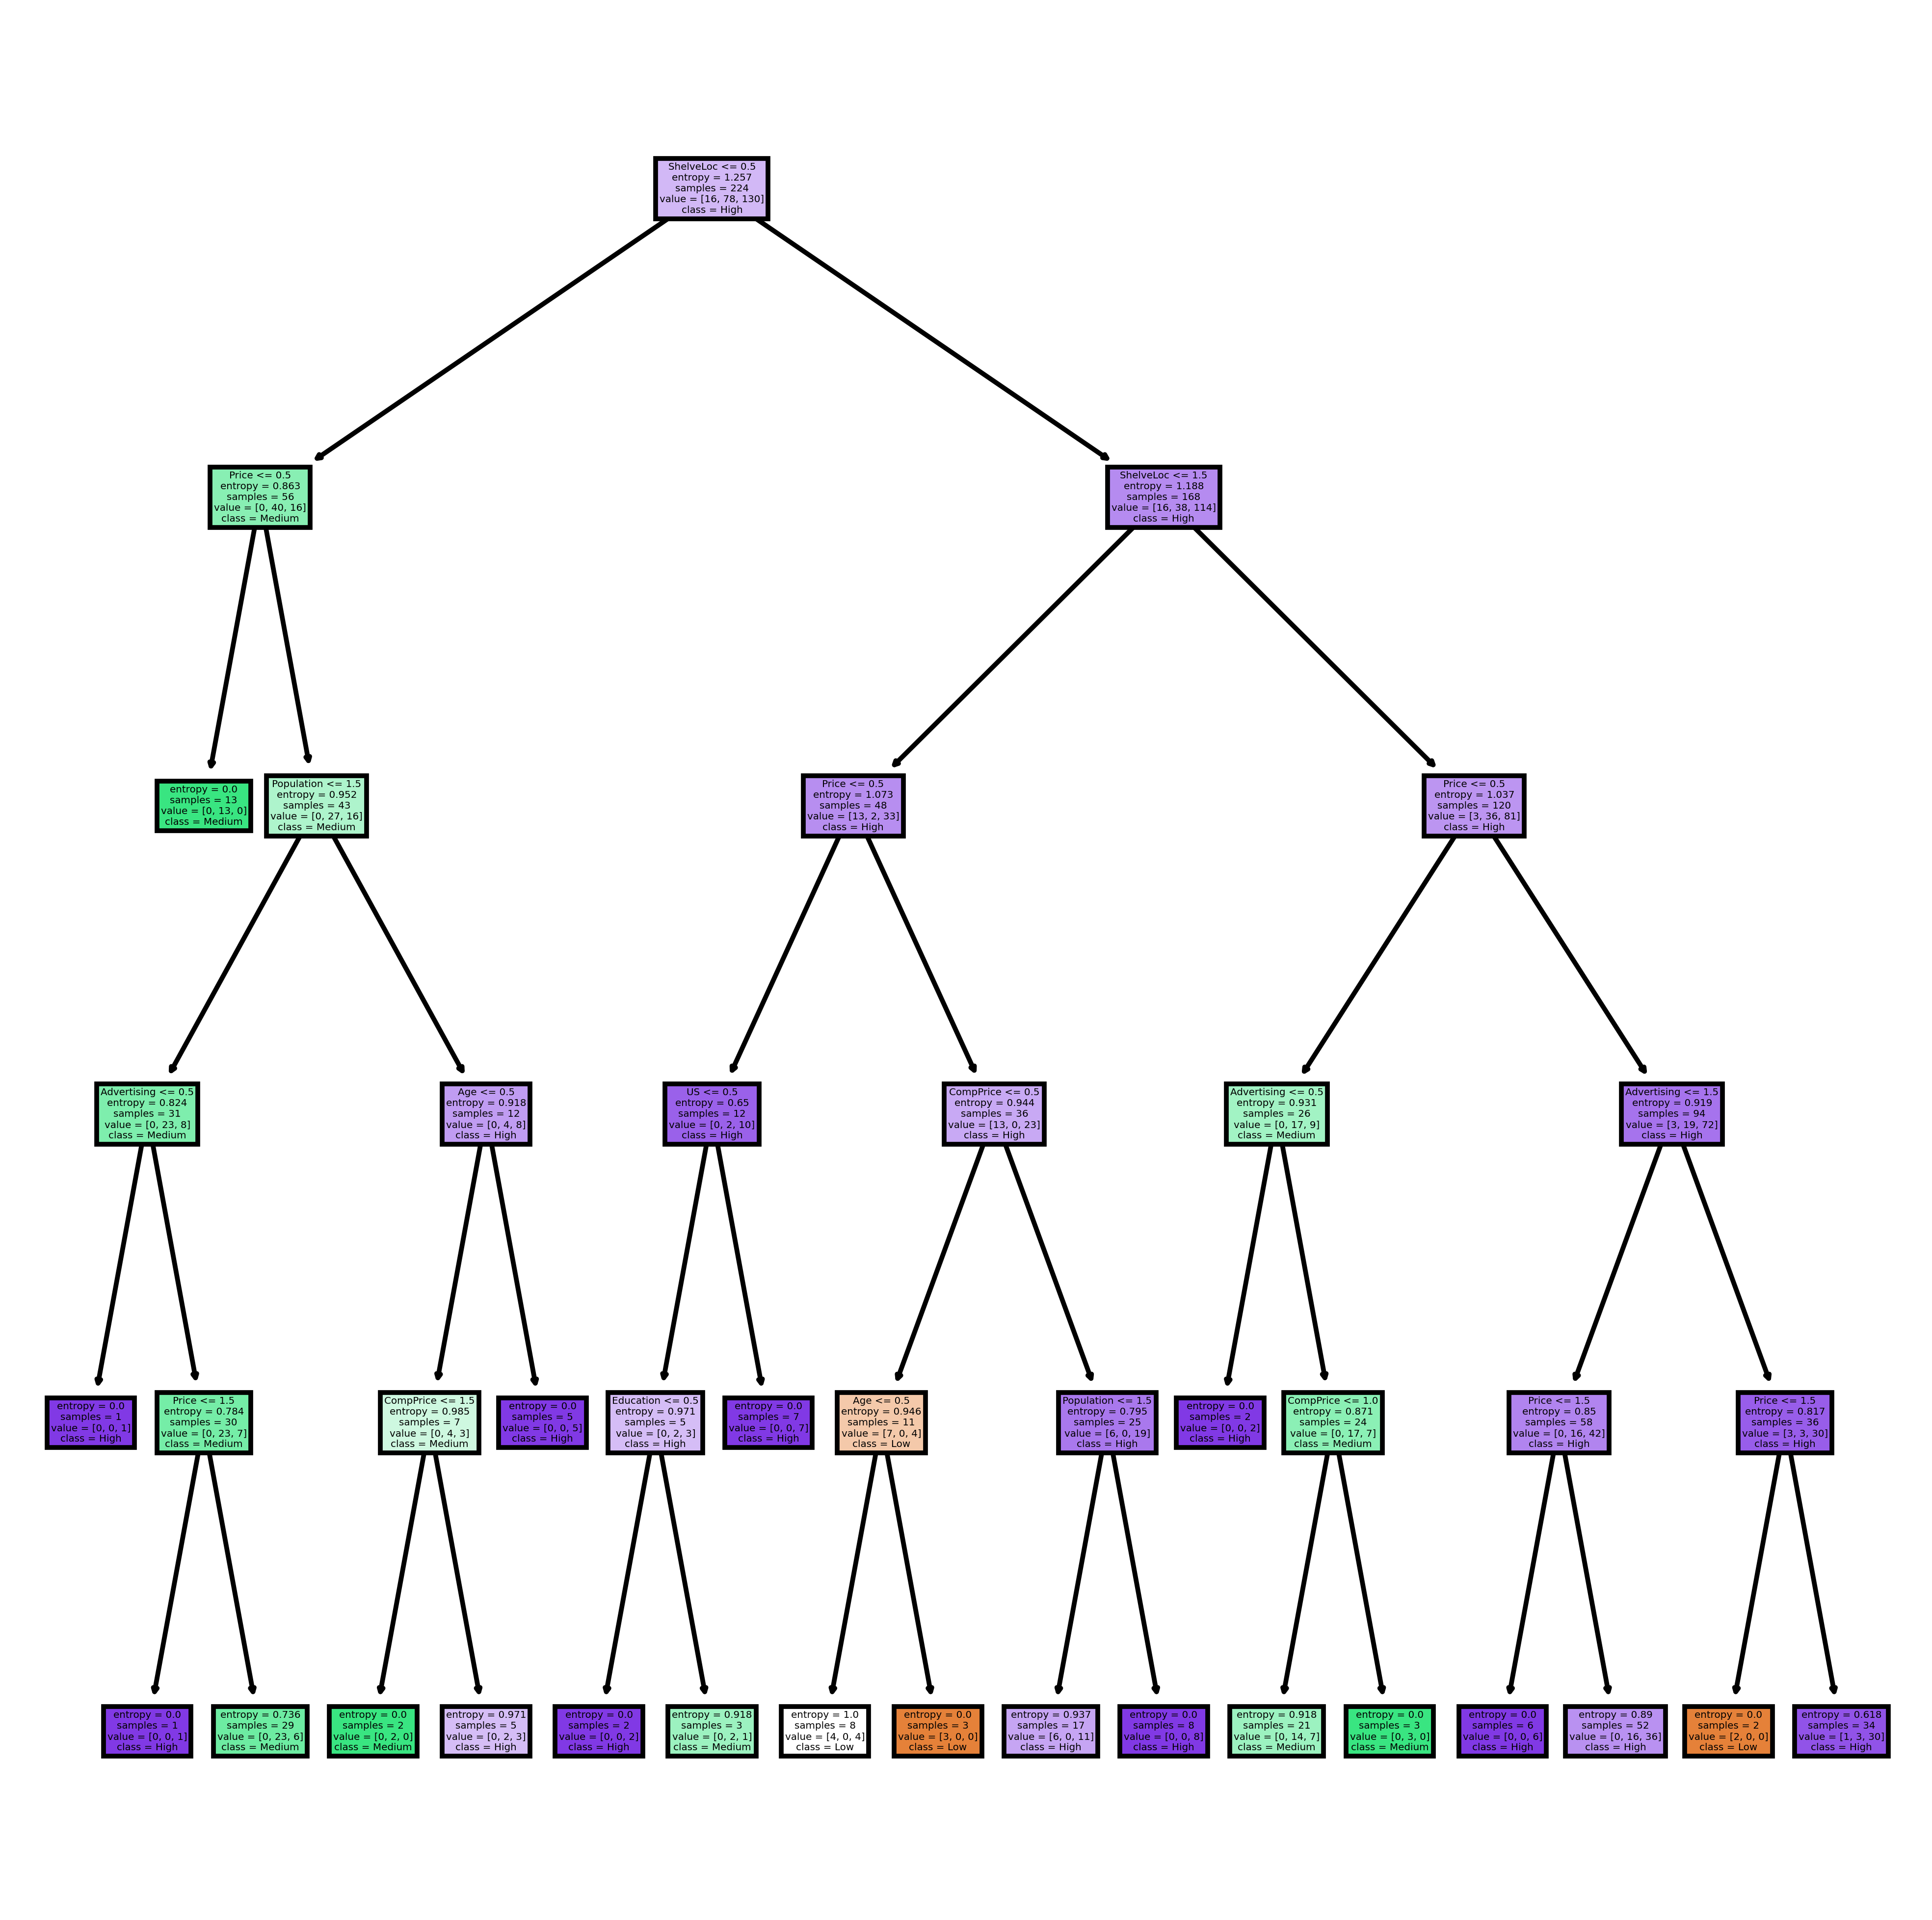

In [35]:
features=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
css=['Low','Medium','High']
fig, axes=plt.subplots(nrows=1,ncols=1,figsize=(7,7),dpi=700)
tree.plot_tree(model1,feature_names=features,class_names=css,filled=True);
plt.show()

In [36]:
predss=model2.predict(x_test)
pd.Series(predss).value_counts()

2    136
1     40
dtype: int64

In [37]:
predss

array([2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2])

In [38]:
pd.crosstab(y_test,predss)

col_0,1,2
Sales,,
0,0,11
1,21,30
2,18,95
3,1,0


In [39]:
model2.score(x_test,y_test)

0.6590909090909091

In [40]:
print(classification_report(y_test,predss))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.53      0.41      0.46        51
           2       0.70      0.84      0.76       113
           3       0.00      0.00      0.00         1

    accuracy                           0.66       176
   macro avg       0.31      0.31      0.31       176
weighted avg       0.60      0.66      0.62       176

